### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [2]:
data = pd.read_csv("../input/wiki_movie_plots_deduped.csv")

### Statistical Analysis

In [3]:
# Show first 10 rows of data
data.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


**Brief description of data:**
The dataset contains descriptions of 34,886 movies from around the world. 

* Release Year: Year in which the movie was released
* Title: Movie title
* Origin/Ethnicity: Origin of movie (i.e. American, Bollywood, Tamil, etc.)
* Director: Director(s)
* Cast: Main actor and actresses
* Genre: Movie Genre(s)
* Wiki Page: URL of the Wikipedia page from which the plot description was scraped
* Plot: Long form description of movie plot

In [4]:
# Shape of data
data.shape

(34886, 8)

In [5]:
# Describe the data
data.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [6]:
# Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
Release Year        34886 non-null int64
Title               34886 non-null object
Origin/Ethnicity    34886 non-null object
Director            34886 non-null object
Cast                33464 non-null object
Genre               34886 non-null object
Wiki Page           34886 non-null object
Plot                34886 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [7]:
# Show columns of data
data.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [8]:
data.dtypes

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object

### Visualization

**The frequency of movies by Origin/Ethnicity:**

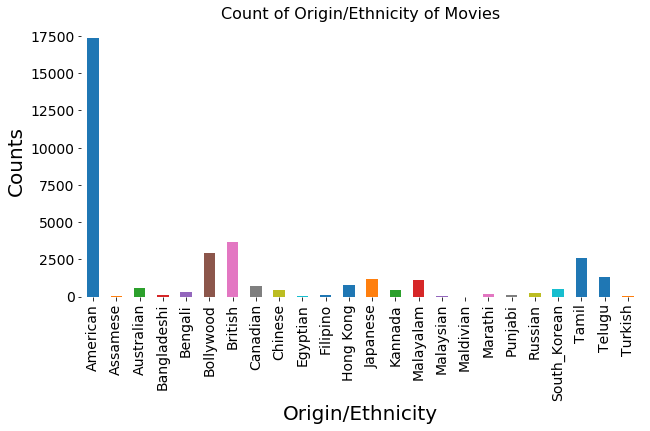

In [9]:
ax = data['Origin/Ethnicity'].value_counts().sort_index().plot.bar(
    figsize = (10, 5),
    fontsize = 14)

ax.set_title("Count of Origin/Ethnicity of Movies", fontsize=16)
plt.xlabel('Origin/Ethnicity', fontsize=20)
plt.ylabel('Counts', fontsize=20)
sns.despine(bottom=True, left=True)

Origin/Ethnicity of American movies are far more than any other movies.

**Count of movies per year**

In [10]:
ax = data['Release Year'].value_counts().sort_index(ascending=True)

Sct = [go.Scatter(x = ax.index, y = ax.values, mode = 'lines', name = 'lines')]
layout = go.Layout(title = 'Movies by year')
fig = go.Figure(data = Sct, layout = layout)
iplot(fig)

There are 1021 movies released in 2013 which is the highest number and suddenly there is a major drop in 2015 which is only 661.

**WordCloud**

WordCloud of Movies Plot

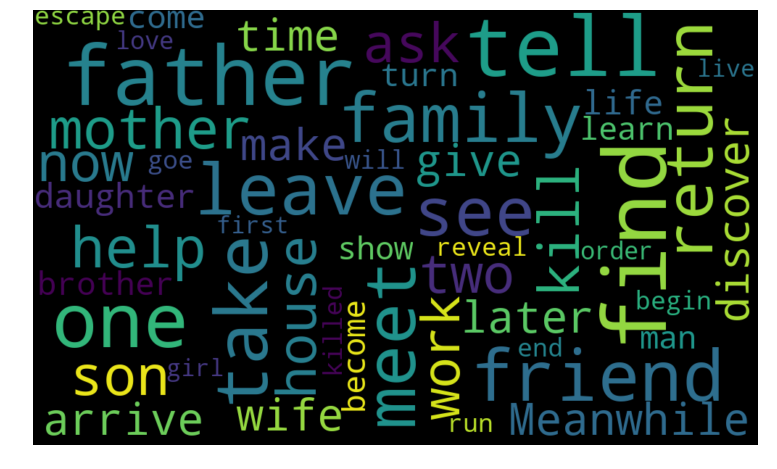

In [11]:
wordcloud = WordCloud(width = 1000, height = 600, max_font_size = 120, max_words = 50).generate(" ".join(data.Plot))

plt.subplots(figsize=(18,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

There are some of the most frequent words used in all the movie plots like father, mother, tell, return, friend, find, help and many more.

**Top titles**

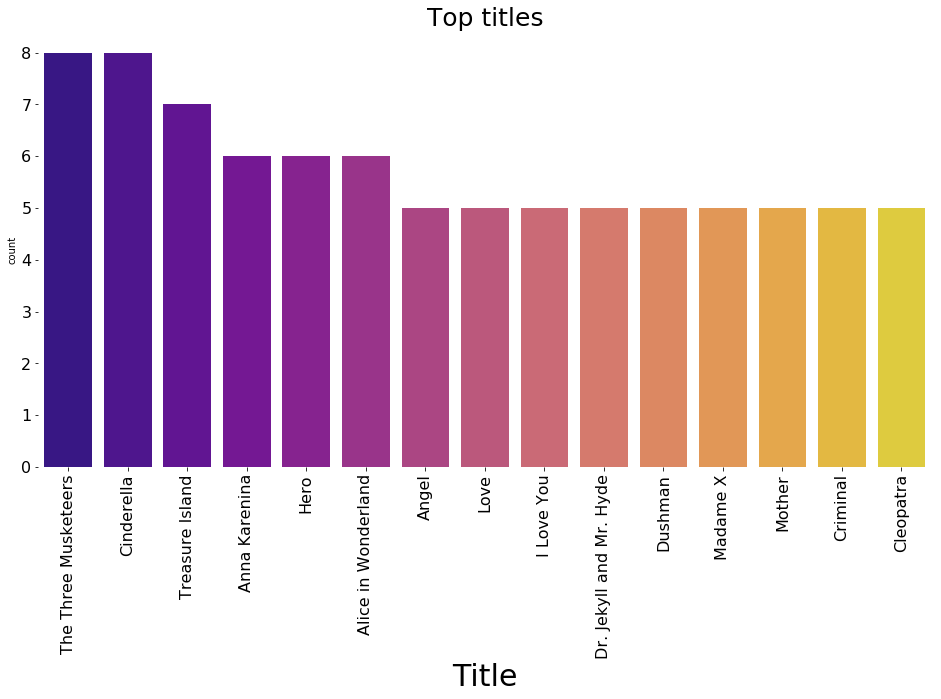

In [12]:
plt.figure(figsize=(16,8))
plt.title('Top titles',fontsize=25)
plt.xlabel('Title', fontsize=30)

sns.countplot(data.Title,order=pd.value_counts(data.Title).iloc[:15].index,palette=sns.color_palette("plasma", 15))

plt.xticks(size=16,rotation=90)
plt.yticks(size=16)
sns.despine(bottom=True, left=True)
plt.show()

**Most frequent Genres**

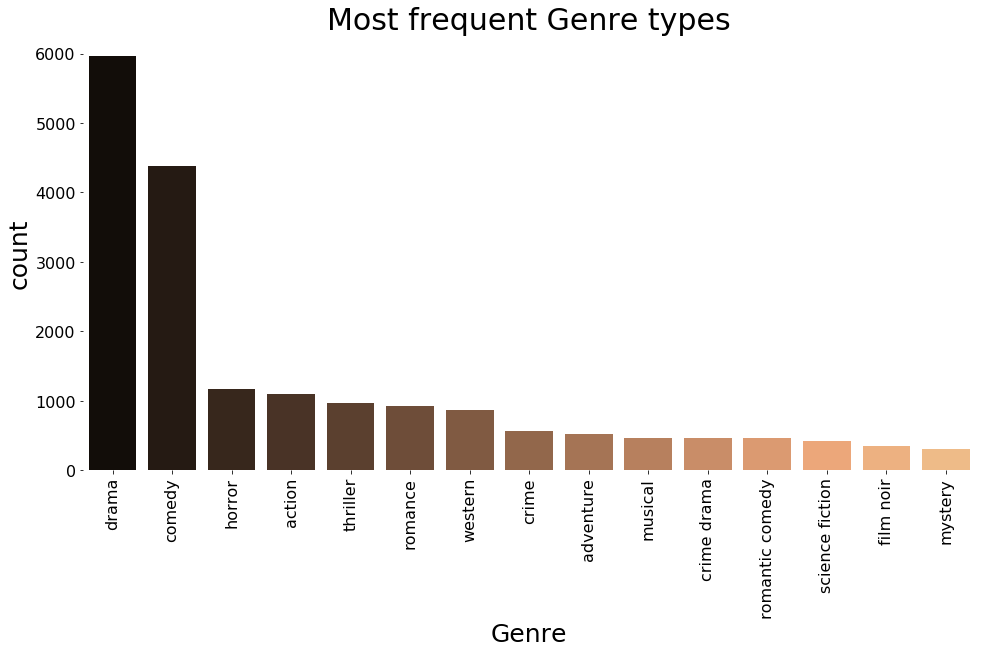

In [13]:
# Removing unknown genres
Gen = data[data.Genre != "unknown"]

plt.figure(figsize=(16,8))
plt.title('Most frequent Genre types',fontsize=30)
plt.xlabel('Genre', fontsize=25)
plt.ylabel('Count', fontsize=25)

sns.countplot(Gen.Genre,order=pd.value_counts(Gen.Genre).iloc[:15].index,palette=sns.color_palette("copper", 15))

plt.xticks(size=16,rotation=90)
plt.yticks(size=16)
sns.despine(bottom=True, left=True)
plt.show()

Drama and Comedy are the top two frequent genres.

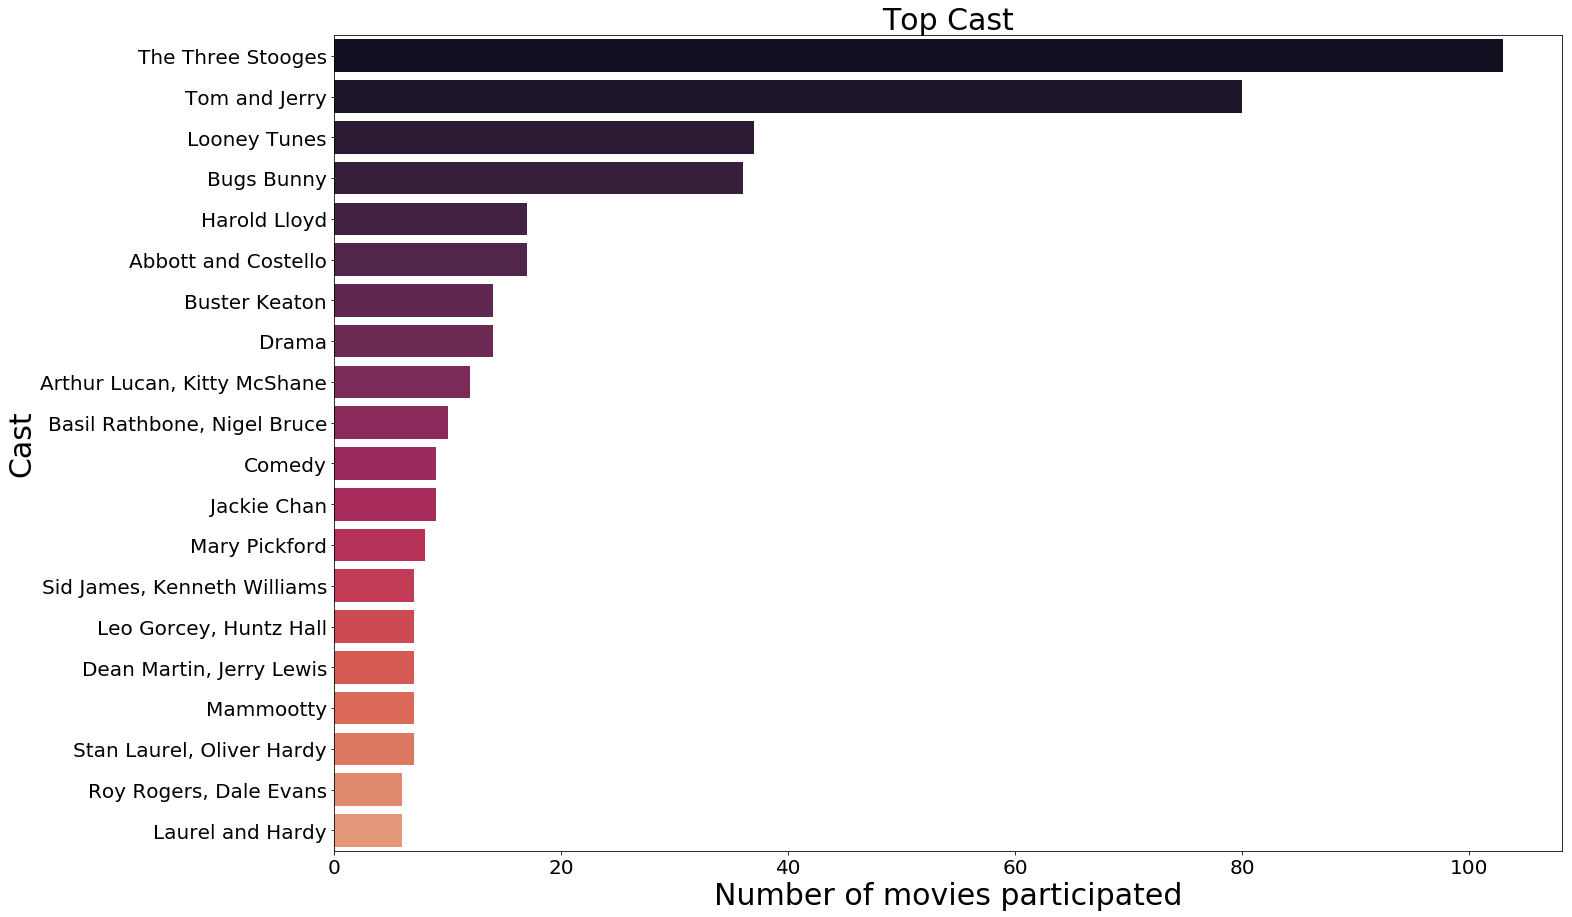

In [14]:
# from https://www.kaggle.com/tatianasnwrt/wikipedia-movie-plots-eda

# Getting rid of null values and invisible characters (non-breaking spaces) 
top_cast = data[(data.Cast.notnull()) & (data.Cast != " ")] 
top_cast.set_index("Cast",inplace=True) 
top_cast.rename(index={'Three Stooges':'The Three Stooges'},inplace=True)

plt.figure(figsize=(22,15))
plt.title('Top Cast',fontsize=30)

sns.countplot(y=top_cast.index,order=pd.value_counts(top_cast.index)[:20].index,palette=sns.color_palette("rocket", 25)) 

plt.ylabel('Cast',fontsize=30)
plt.xlabel('Number of movies participated',fontsize=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Top directors**

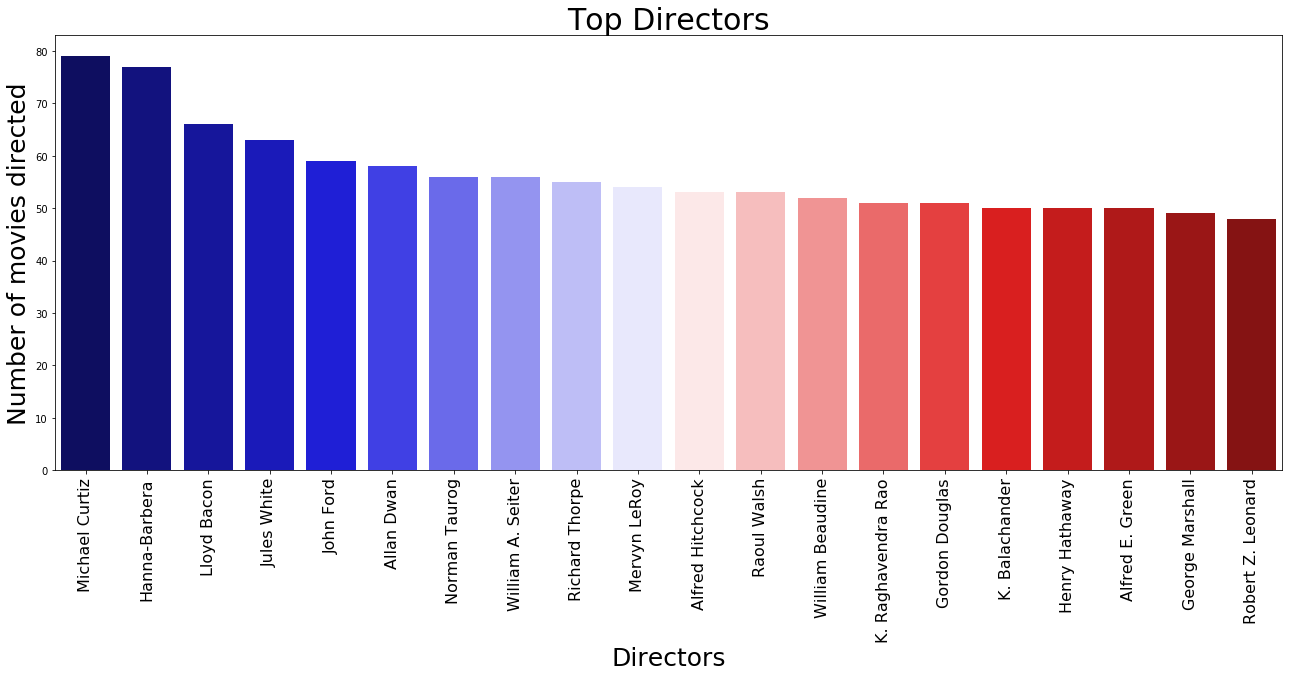

In [15]:
# Removing Unknown directors to get a clear picture of our data
Dir = data[data.Director != "Unknown"]

plt.figure(figsize=(22,8))
plt.title('Top Directors',fontsize=30)

sns.countplot(Dir.Director, order=pd.value_counts(Dir.Director)[:20].index, palette=sns.color_palette("seismic", 20))

plt.xlabel('Directors',fontsize=25)
plt.ylabel('Number of movies directed',fontsize=25)
plt.xticks(size=16,rotation=90)
plt.show()

**If you like it please upvote this kernel and if you have any suggestions or want to say anything please leave a comment.**